## CMPINF 2100 Week 09
### Introduction to Regression: Assumption of the Linear Model
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Regression

We will begin with the LINEAR MODEL. You commonly hear this described as LINEAR REGRESSION.

The goal of regression is to predict a CONTINOUS OUTPUT **GIVEN** INPUTS.

For now, we will start simple with a SINGLE continuous input.

The Regression Model is BETwEEN the OUTPUT and the INPUT...I typically describe the relationship DIFFERENTLY.

I like to be SPECIFIC about where the MODEL is actually applied!!!

The model does **NOT** predict the OUTPUT!!!

The model predicts the **AVERAGE** or **MEAN** output!!

The AVERAGE OUTPUT depends on the INPUT!!

The math notation:

$$\mu = \beta_0 + \beta_1\times x $$

## Visualize the trend vs the input

To do this, we need to CREATE our own data.

I like to SEE the assumptions of the LINEAR MODEL by GENERATING our own data!!!

Create a DataFrame that contains a SINGLE continuous input, x, between -3.5 and 3.5

In [3]:
df_viz = pd.DataFrame({"x": np.linspace(-3.5, 3.5, num=101)})

In [8]:
df_viz

,x
0,-3.50
1,-3.43
2,-3.36
3,-3.29
4,-3.22
...,...
96,3.22
97,3.29
98,3.36
99,3.43


To calc the TREND or the AVG OUTPUT we need to KNOW the coefficients, the INTERCEPT and the SLOPE of the model!!

In [51]:
my_intercept=0,
my_slope=-1

In [66]:
df_viz["trend"] = my_intercept + my_slope*df_viz.x

In [67]:
df_viz

,x,trend
0,-3.50,3.50
1,-3.43,3.43
2,-3.36,3.36
3,-3.29,3.29
4,-3.22,3.22
...,...,...
96,3.22,-3.22
97,3.29,-3.29
98,3.36,-3.36
99,3.43,-3.43


Visualize the relationship in Seaborn using a LINE CHART.

In [68]:
sns.set_style("whitegrid")

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


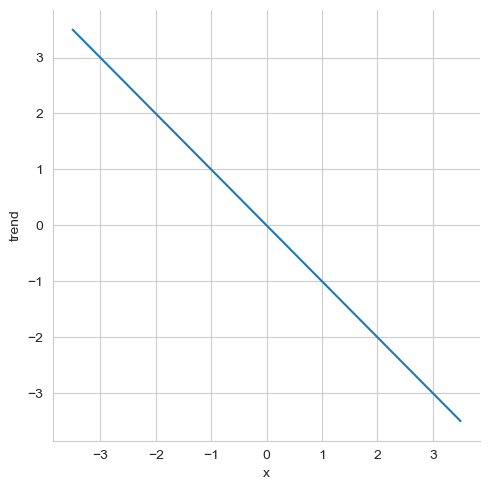

In [69]:
sns.relplot(data=df_viz, x="x", y="trend", kind="line")

plt.show()

### Randomness

The complete story of a linear model involves RANDOMNESS!!

Up to this point, I have referred to the MODEL as BETWEEN the AVG OUTPUT or TREND and the INPUT!!

The OBSERVED OUTPUT is **RANDOMLY** distributed around the AVG OUTPUT!!!

The OBSERVED OUTPUT is **NORMALLY** distributed around the AVG OUTPUT!!

The RANDOMESS represents that there is a LIKELIHOOD between the OBSERVED OUTPUT and the TREND!!

We will SIMULATE random outputs around the TREND.

We therefore need to set the seed to ensure reproducibility!

In [36]:
rg = np.random.default_rng(2100)

But lets create a smaller data set to help visualize randomness.

This data set will have 9 unique values of the input between -3 and 3.

In [54]:
df = pd.DataFrame({"x": np.linspace(-3, 3, num=9)})

In [55]:
df

,x
0,-3.00
1,-2.25
2,-1.50
3,-0.75
4,0.00
5,0.75
6,1.50
7,2.25
8,3.00


In [56]:
df["trend"] = my_intercept + my_slope*df.x

In [57]:
df

,x,trend
0,-3.00,3.00
1,-2.25,2.25
2,-1.50,1.50
3,-0.75,0.75
4,0.00,0.00
5,0.75,-0.75
6,1.50,-1.50
7,2.25,-2.25
8,3.00,-3.00


The randomness comes into play due to the OUTPUT around the TREND!!!

We must set the STD in our Gaussian LIKELIHOOD.

In [58]:
sigma_noise = 1.25

In [59]:
df["y"] = rg.normal(loc=df.trend.to_numpy(), scale=sigma_noise, size=df.shape[0])

In [60]:
df

,x,trend,y
0,-3.00,3.00,4.336360
1,-2.25,2.25,1.996986
2,-1.50,1.50,-0.107502
3,-0.75,0.75,0.509130
4,0.00,0.00,-1.523273
5,0.75,-0.75,-0.542254
6,1.50,-1.50,-0.743836
7,2.25,-2.25,0.027943
8,3.00,-3.00,-4.293591


Plot the random OUTPUT vs the INPUT via a scatter plot.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


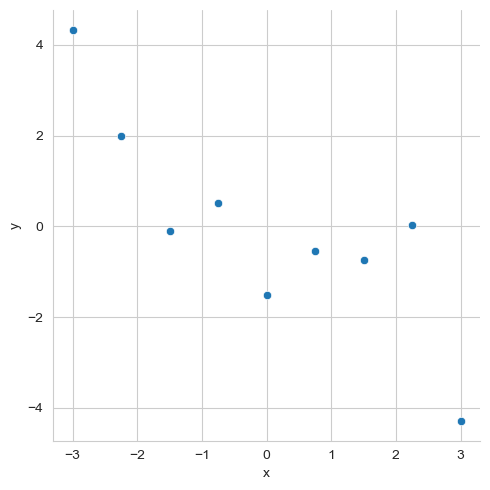

In [61]:
sns.relplot(data=df, x="x", y="y", kind="scatter")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


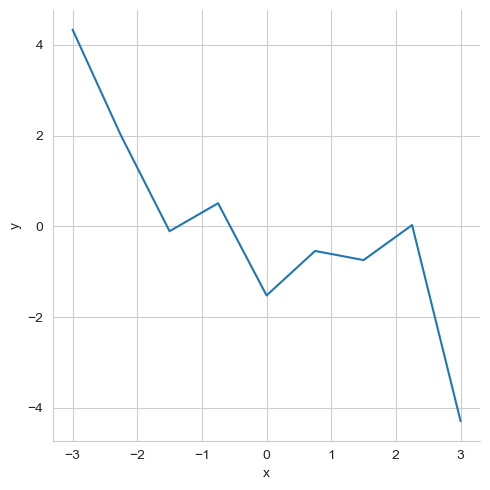

In [62]:
sns.relplot(data=df, x="x", y="y", kind="line")

plt.show()

Create a composite figure to show the observed random outputs around the TREND.

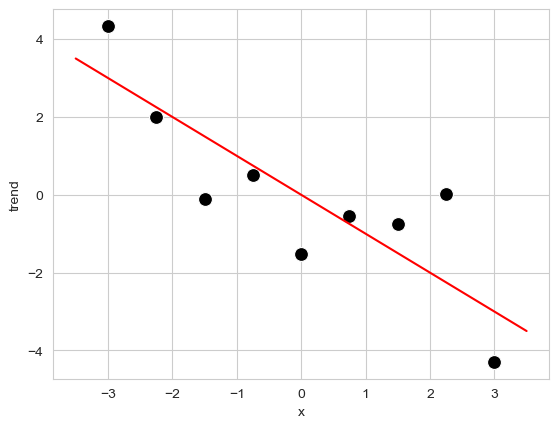

In [70]:
fig, ax = plt.subplots()

sns.lineplot(data=df_viz, x="x", y="trend", color="red", ax=ax)

sns.scatterplot(data=df, x="x", y="y", s=100, color="k", ax=ax)

plt.show()

What happens if we RANDOMLY generate MORE observations?

What if we REPLICATE calling the random number generator more times!!!

In [71]:
df_try = df.copy()

In [72]:
df_try

,x,trend,y
0,-3.00,3.00,4.336360
1,-2.25,2.25,1.996986
2,-1.50,1.50,-0.107502
3,-0.75,0.75,0.509130
4,0.00,0.00,-1.523273
5,0.75,-0.75,-0.542254
6,1.50,-1.50,-0.743836
7,2.25,-2.25,0.027943
8,3.00,-3.00,-4.293591


Lets ADD 2 new columns where we cann the random number generator 2 more times.

In [73]:
df_try["y1"] = rg.normal(loc=df.trend.to_numpy(), scale=sigma_noise, size=df.shape[0])

In [74]:
df_try["y2"] = rg.normal(loc=df.trend.to_numpy(), scale=sigma_noise, size=df.shape[0])

In [75]:
df_try

,x,trend,y,y1,y2
0,-3.00,3.00,4.336360,3.929270,2.548194
1,-2.25,2.25,1.996986,2.594865,3.972201
2,-1.50,1.50,-0.107502,3.722336,3.072299
3,-0.75,0.75,0.509130,1.883582,2.566032
4,0.00,0.00,-1.523273,-0.236696,-1.629291
5,0.75,-0.75,-0.542254,-0.267712,-0.409659
6,1.50,-1.50,-0.743836,-1.802036,-2.812908
7,2.25,-2.25,0.027943,-1.964094,-3.046768
8,3.00,-3.00,-4.293591,-2.240245,-3.813279


Visualize the 3 rests of randomly generated outputs together.

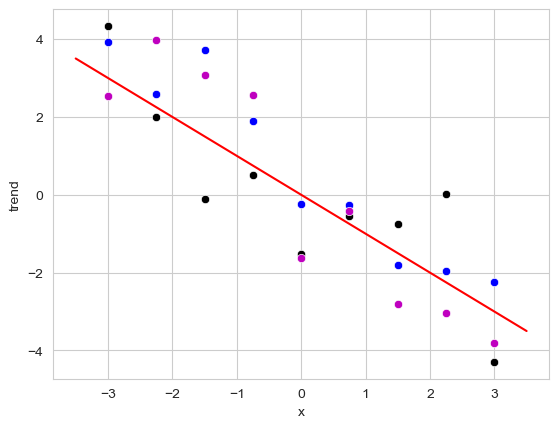

In [76]:
fig, ax = plt.subplots()

sns.lineplot(data=df_viz, x="x", y="trend", color="red", ax=ax)

sns.scatterplot(data=df_try, x="x", y="y", color="k", ax=ax)
sns.scatterplot(data=df_try, x="x", y="y1", color="b", ax=ax)
sns.scatterplot(data=df_try, x="x", y="y2", color="m", ax=ax)



plt.show()

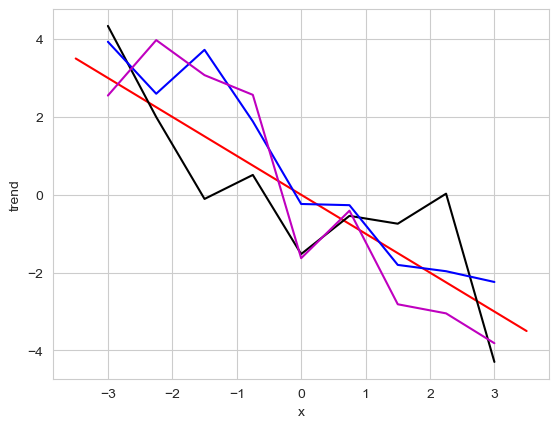

In [77]:
fig, ax = plt.subplots()

sns.lineplot(data=df_viz, x="x", y="trend", color="red", ax=ax)

sns.lineplot(data=df_try, x="x", y="y", color="k", ax=ax)
sns.lineplot(data=df_try, x="x", y="y1", color="b", ax=ax)
sns.lineplot(data=df_try, x="x", y="y2", color="m", ax=ax)



plt.show()

What if we could REPLICATE many, many, many times??

How will the random obs be DISTRIBUTED around the **TRUE** trend???

Define a function which calcs the trend for a given set of INTERCEPTs and SLOPEs and then GENERATES random ouputs around the trend for a given standard deviation.

In [78]:
def generate_lm_y(rid, xuse, b0, b1, sigma_use):
    res_df = pd.DataFrame({"x": xuse})
    res_df["trend"] = b0 + b1*res_df.x

    res_df["y"] = rg.normal(loc=res_df.trend.to_numpy(),
                            scale=sigma_use,
                            size=res_df.shape[0])
    res_df["rep_id"] = rid

    return res_df

In [80]:
generate_lm_y(0, df.x, my_intercept, my_slope, sigma_noise)

,x,trend,y,rep_id
0,-3.00,3.00,3.093531,0
1,-2.25,2.25,1.109161,0
2,-1.50,1.50,-0.145713,0
3,-0.75,0.75,1.520425,0
4,0.00,0.00,0.663213,0
5,0.75,-0.75,-0.707066,0
6,1.50,-1.50,0.203072,0
7,2.25,-2.25,-1.073809,0
8,3.00,-3.00,-3.423369,0


Lets replicate 4 times!!!

In [82]:
study_4_list = []

for ix in range(4):
    study_4_list.append(generate_lm_y(ix, df.x, my_intercept, my_slope, sigma_noise))

In [86]:
study_4_list[0]

,x,trend,y,rep_id
0,-3.00,3.00,3.395881,0
1,-2.25,2.25,1.764248,0
2,-1.50,1.50,2.174111,0
3,-0.75,0.75,0.539349,0
4,0.00,0.00,1.583191,0
5,0.75,-0.75,-1.957461,0
6,1.50,-1.50,-1.699771,0
7,2.25,-2.25,-1.892236,0
8,3.00,-3.00,-2.928456,0


Vertically STACK or COMBINE the dataframes in the list!!

In [88]:
study_4_df = pd.concat(study_4_list, ignore_index=True)

In [89]:
study_4_df

,x,trend,y,rep_id
0,-3.00,3.00,3.395881,0
1,-2.25,2.25,1.764248,0
2,-1.50,1.50,2.174111,0
3,-0.75,0.75,0.539349,0
4,0.00,0.00,1.583191,0
5,0.75,-0.75,-1.957461,0
6,1.50,-1.50,-1.699771,0
7,2.25,-2.25,-1.892236,0
8,3.00,-3.00,-2.928456,0
9,-3.00,3.00,3.783221,1


Visualize the 4 random replications!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


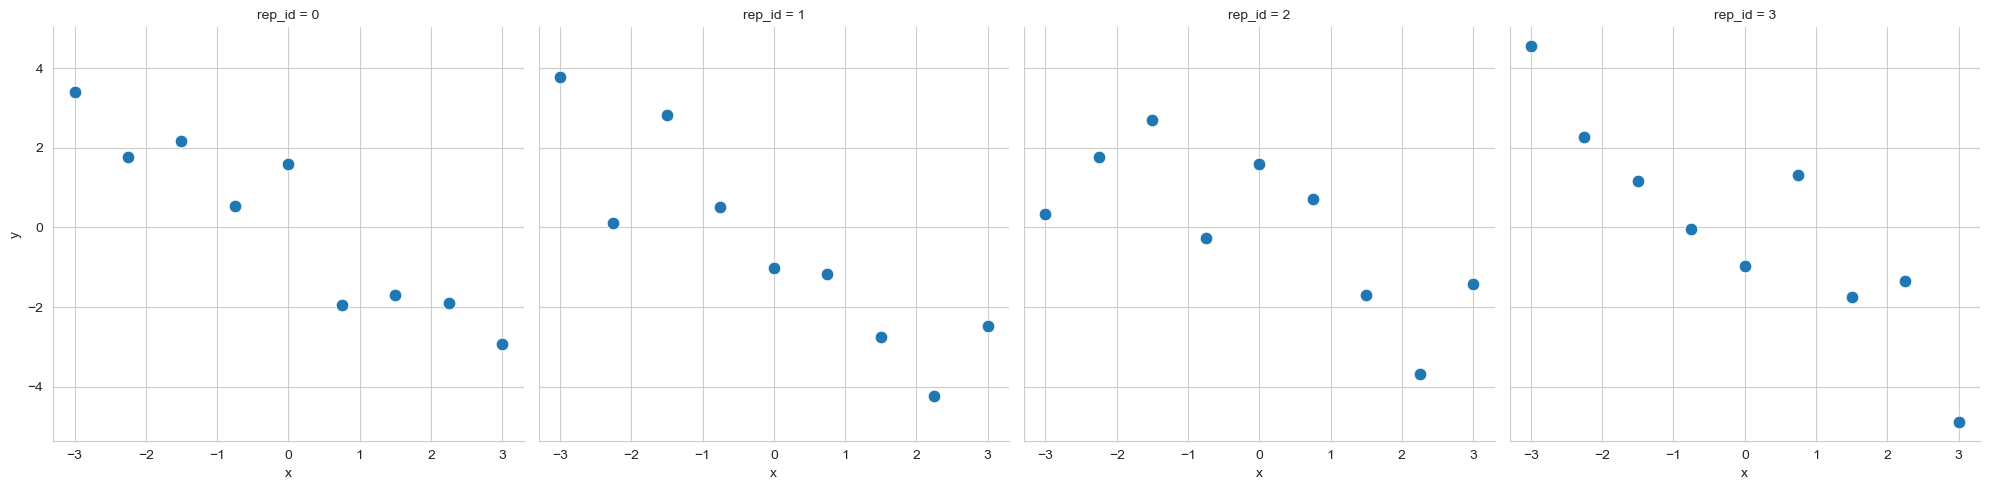

In [91]:
sns.relplot(data=study_4_df, x="x", y="y", col="rep_id", s=85)

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


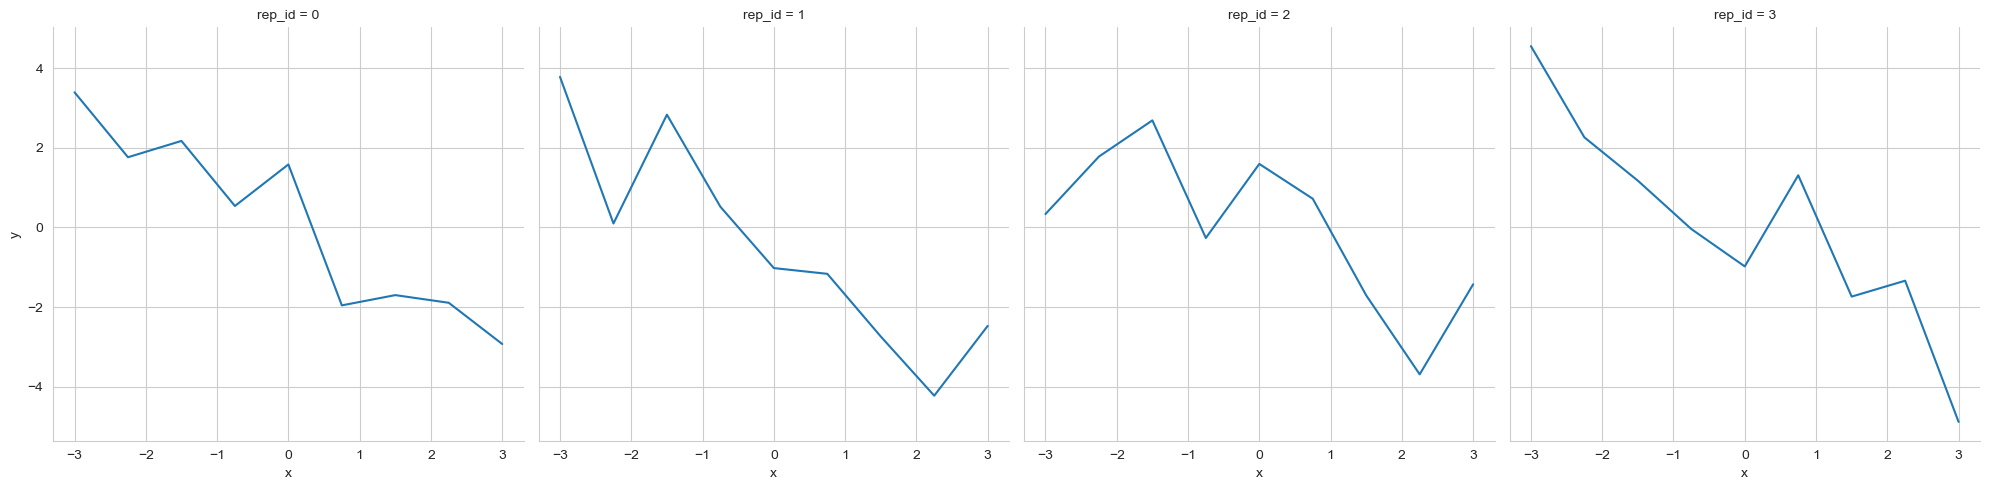

In [93]:
sns.relplot(data=study_4_df, x="x", y="y", col="rep_id", kind="line")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


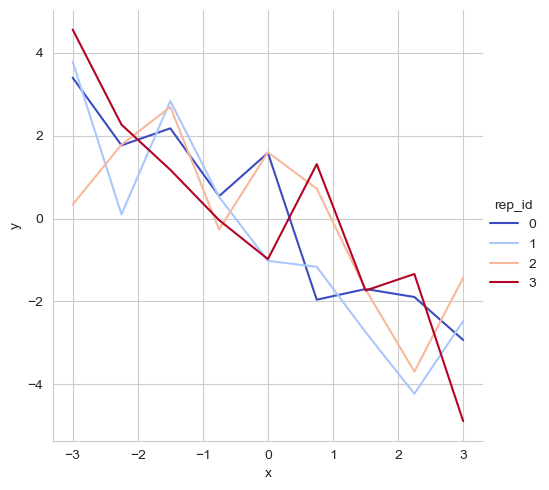

In [95]:
sns.relplot(data=study_4_df, x="x", y="y", hue="rep_id", kind="line", palette="coolwarm")

plt.show()

But what we really care about is the **AVERAGE** output!!

How is the **AVERAGE** changing as the INPUT changes???

Lets calculate the AVG output for each unique value of the input!!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


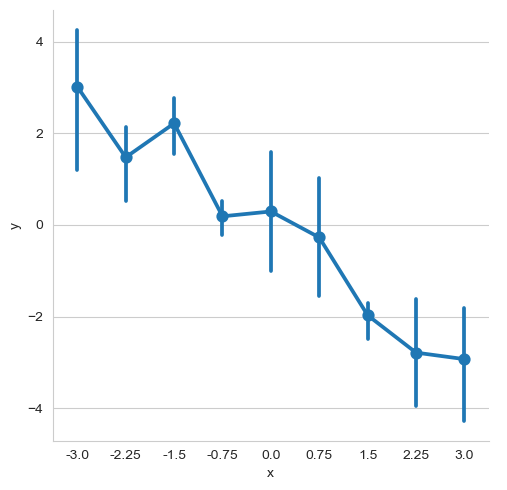

In [96]:
sns.catplot(data=study_4_df, x="x", y="y", kind="point")

plt.show()

We could create this kind of figure with the sns.lmplot.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


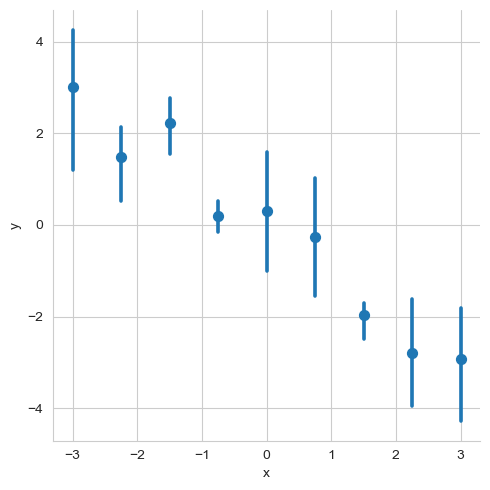

In [97]:
sns.lmplot(data=study_4_df, x="x", y="y", fit_reg=False, x_estimator=np.mean)

plt.show()

What if we used 20 replications instead of 4??

In [98]:
study_20_list = []

for ix in range(20):
    study_20_list.append(generate_lm_y(ix, df.x, my_intercept, my_slope, sigma_noise))

In [99]:
study_20_df = pd.concat(study_20_list, ignore_index=True)

In [100]:
study_20_df

,x,trend,y,rep_id
0,-3.00,3.00,2.520538,0
1,-2.25,2.25,1.888700,0
2,-1.50,1.50,3.776476,0
3,-0.75,0.75,0.269154,0
4,0.00,0.00,-1.333615,0
...,...,...,...,...
175,0.00,0.00,-0.674760,19
176,0.75,-0.75,0.623255,19
177,1.50,-1.50,-0.584000,19
178,2.25,-2.25,-2.621819,19


/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


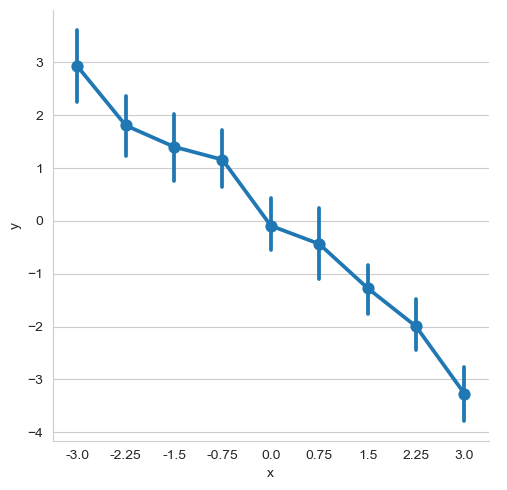

In [101]:
sns.catplot(data=study_20_df, x="x", y="y", kind="point")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


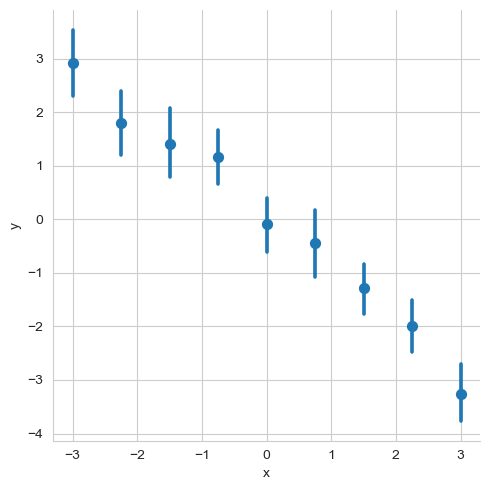

In [102]:
sns.lmplot(data=study_20_df, x="x", y="y", fit_reg=False, x_estimator=np.mean)

plt.show()

Replicate it 500 times!!

In [104]:
study_500_list = []

for ix in range(500):
    study_500_list.append(generate_lm_y(rid=ix, xuse=df.x, b0=my_intercept, b1=my_slope, sigma_use=sigma_noise))

In [105]:
study_500_df = pd.concat(study_500_list, ignore_index=True)

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


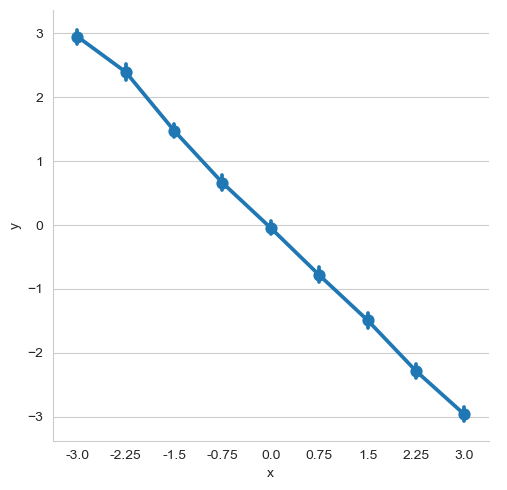

In [106]:
sns.catplot(data=study_500_df, x="x", y="y", kind="point")

plt.show()

I will plot the OBSERVATIONS from the 500 replications on top of the TRUE TREND and the Sample average at each input location.

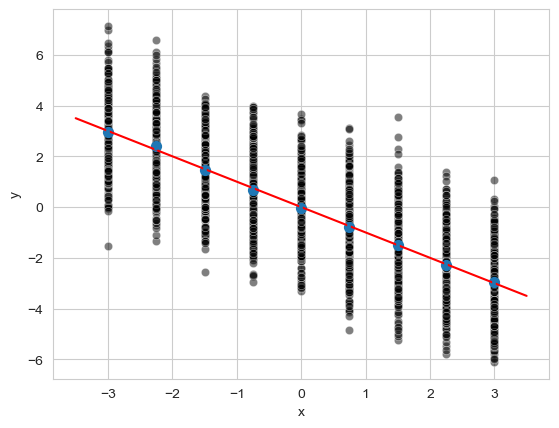

In [107]:
fig, ax = plt.subplots()

sns.scatterplot(data=study_500_df, x="x", y="y", alpha=0.5, color="k", ax=ax)

sns.lineplot(data=df_viz, x="x", y="trend",color="r", ax=ax)

sns.regplot(data=study_500_df, x="x", y="y", fit_reg=False, x_estimator=np.mean, ax=ax)

plt.show()

Lets look at the VARIATION around the TRUE TREND in more detail via BOXPLOTS.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


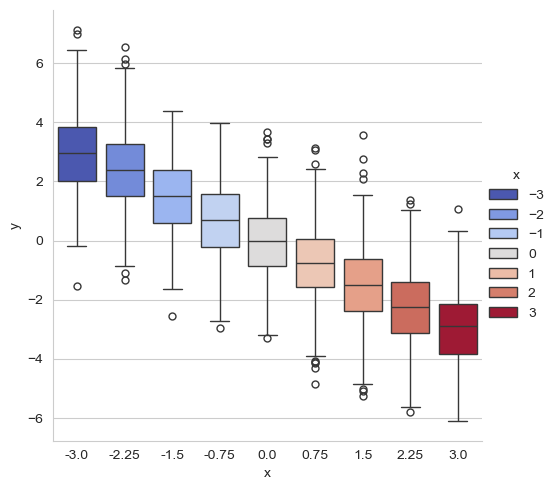

In [110]:
sns.catplot(data=study_500_df, x="x", y="y", hue="x", kind="box", palette="coolwarm")

plt.show()

Boxplots do not show the distributional SHAPE of the data.

Lets look at the distributional shape of the 500 replications at each input location using VIOLINS.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


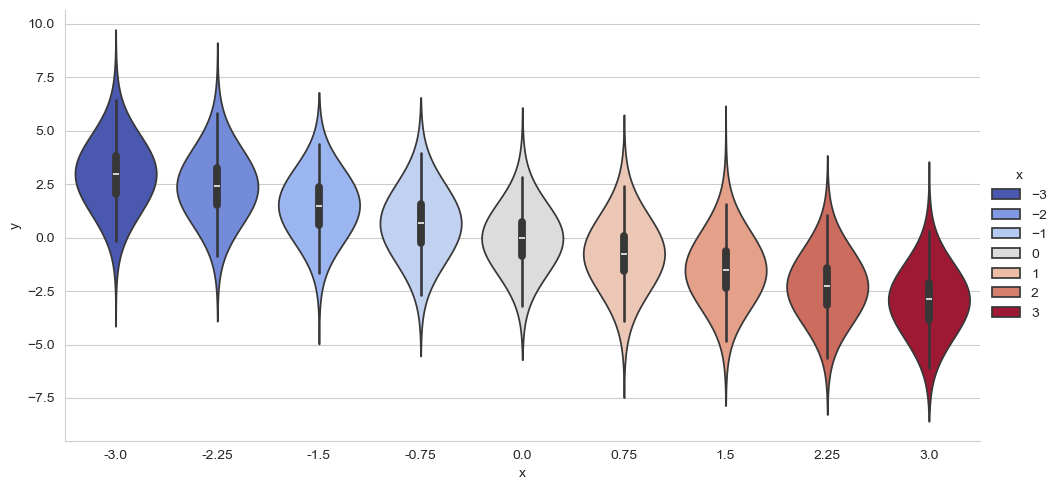

In [114]:
sns.catplot(data=study_500_df, x="x", y="y", hue="x", kind="violin", palette="coolwarm", aspect=2, bw_method=1)

plt.show()

## Why did we do this?

This simple SIMULATION example reveals NEARLY all of the assumptions of the LINEAR MODEL for regression!!!

You have learned that the AVG OUTPUT depends on the INPUT!!

Changing the INPUT CHANGES the AVG OUTPUT (TREND)!!

The VARIATION around the TREND is **CONSTANT** and does NOT change as the INPUT changes!!!

The OUTPUT is **NORMALLY** distributed around the AVG OUTPUT!!